<h2 style="text-align:center;">Can We do better than the Linear regression for the delay data by using polynomial?</h2>

In [1]:
import os
os.chdir(r"C:\Users\User\OneDrive\Documents\Data Science 2025.2026")
os.getcwd()

'C:\\Users\\User\\OneDrive\\Documents\\Data Science 2025.2026'

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

# 1. Load the dataset

In [5]:
df=pd.read_csv("airline_delay.csv")
df.head(3)

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2020,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",44.0,3.0,1.63,0.0,...,0.0,1.25,0.0,1.0,89.0,56.0,0.0,3.0,0.0,30.0
1,2020,12,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",90.0,1.0,0.96,0.0,...,0.0,0.00,0.0,0.0,23.0,22.0,0.0,1.0,0.0,0.0
2,2020,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,8.0,5.75,0.0,...,0.0,0.65,0.0,1.0,338.0,265.0,0.0,45.0,0.0,28.0


# 2. Data Preprocessing, we focus on Volume vs Delay

In [7]:
# We focus purely on 'arr_flights' (Volume) to visualize the curve easily
X = df[['arr_flights']].dropna()#(dropna)Removing the NaN values (rowwise) from the arr_flights
y = df.loc[X.index, 'arr_delay']#extracts the target variable y from the DF so that it aligns exactly with the rows used in X

# 3. Split the data into training and Test

In [8]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42)#The random_state=42, ensures that the same rows always end up in the training and test sets every time you run the code.

# 4 Models
## 4.1 MODEL A: Standard regression (The baseline)--

In [10]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
lin_preds = lin_model.predict(X_test)

## 4.2 Model B: Polynomial regression model

In [12]:
# We transform inputs into "Degree 2" (Squared terms)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
poly_preds = poly_model.predict(X_test_poly)

## 4.3 Model Comparison

In [14]:
print(f"--- Linear Model Results ---")
print(f"R2 Score: {r2_score(y_test, lin_preds):.4f}")
print(f"MAE:      {mean_absolute_error(y_test, lin_preds):.0f} minutes")
print(f"\n--- Polynomial Model (Degree 2) Results ---")
print(f"R2 Score: {r2_score(y_test, poly_preds):.4f}")
print(f"MAE:      {mean_absolute_error(y_test, poly_preds):.0f} minutes")

--- Linear Model Results ---
R2 Score: 0.6405
MAE:      1334 minutes

--- Polynomial Model (Degree 2) Results ---
R2 Score: 0.6070
MAE:      1334 minutes


# 5 Visualizations

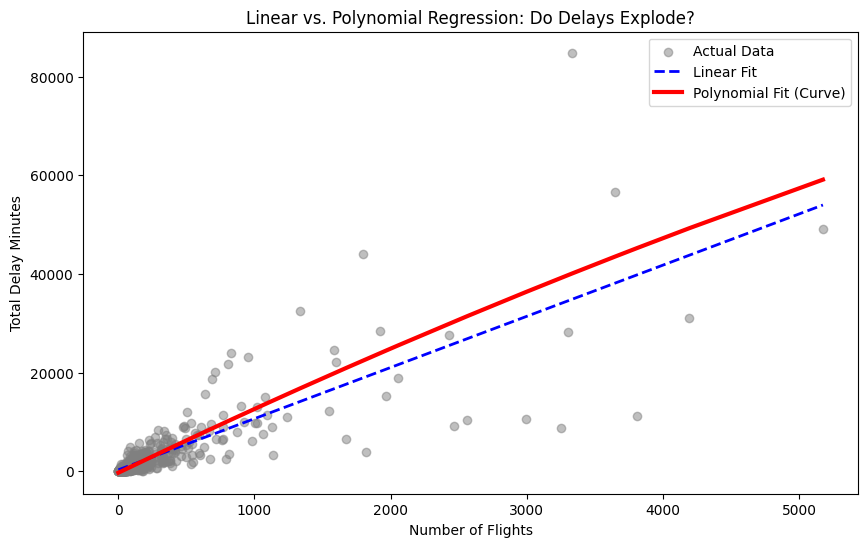

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='gray', alpha=0.5, label='Actual Data')

# Sort data for clean plotting of the line
sorted_idx = np.argsort(X_test['arr_flights'])
X_test_sorted = X_test.iloc[sorted_idx]
poly_preds_sorted = poly_preds[sorted_idx]
lin_preds_sorted = lin_preds[sorted_idx]

plt.plot(X_test_sorted, lin_preds_sorted, color='blue', linewidth=2, linestyle='--', label='Linear Fit')
plt.plot(X_test_sorted, poly_preds_sorted, color='red', linewidth=3, label='Polynomial Fit (Curve)')

plt.title("Linear vs. Polynomial Regression: Do Delays Explode?")
plt.xlabel("Number of Flights")
plt.ylabel("Total Delay Minutes")
plt.legend()
plt.show()

# 🧪 Experiment Analysis: Linear vs. Polynomial Regression

### 1. The "Carrier Effect" Discovery
* **Observation:** In our previous model (using both `arr_flights` and `carrier`), we achieved **95% accuracy**. In this experiment (using *only* `arr_flights`), accuracy dropped to **64%**.
* **Insight:** This mathematically proves that **Flight Volume alone is not enough** to predict delays. Approximately **30% of the variance** is explained by *who* is flying (the Airline's operational efficiency), not just *how much* they are flying.

### 2. Linearity vs. Complexity
* **Hypothesis:** We tested if delays increase exponentially with volume (e.g., congestion collapse).
* **Result:**
    * **Linear Model ($R^2$):** 0.6405
    * **Polynomial Model ($R^2$):** 0.6070
* **Conclusion:** The Polynomial model performed **worse** than the simple Linear model. This indicates that the relationship between flight volume and delays is **Strictly Linear**. Adding complexity (curves) only introduced noise (overfitting), confirming that delays grow steadily, not exponentially.

### 🏁 Final Verdict
We reject the Polynomial model. The **Simple Linear Regression** (with Carrier data included) remains the champion model for this dataset.